| Heights| Weights| Lable         
| :-     |------: | :-:
| 158cm  | 64kg   | M
| 170cm  | 66kg   | M
| 183cm  | 84kg   | M
| 191cm  | 80kg   | M
| 155cm  | 49kg   | F
| 163cm  | 59kg   | F
| 180cm  | 67kg   | F
| 158cm  | 54kg   | F
| 178cm  | 77kg   | F

In [2]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

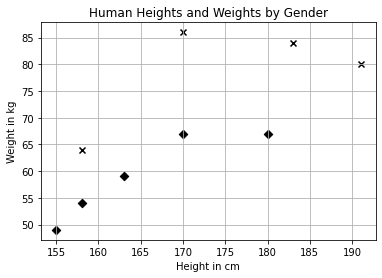

In [6]:
X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.grid(True)
plt.show()

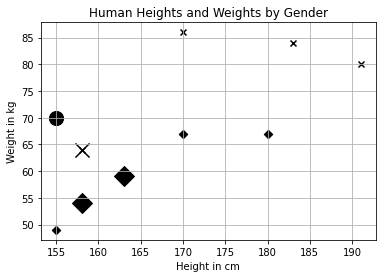

In [8]:
X_train = np.array([
    [158, 64],
    [170, 86],
    [183, 84],
    [191, 80],
    [155, 49],
    [163, 59],
    [180, 67],
    [158, 54],
    [170, 67]
])
y_train = ['male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'female']

plt.figure()
plt.title('Human Heights and Weights by Gender')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
plt.scatter(158, 64, s=200, c='k', marker='x')
plt.scatter(163, 59, s=200, c='k', marker='D')
plt.scatter(158, 54, s=200, c='k', marker='D')
plt.scatter(155, 70, s=200, c='k', marker='o')
plt.grid(True)
plt.show()

# Euclidean distance
$d(p,q) = d(q,p) = \sqrt{(q_1-p_1)^2+(q_2-p_2)^2}$

In [4]:
x = np.array([[155, 70]])

distances = np.sqrt(np.sum((X_train - x)**2, axis=1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

# Choose the closest 3 points.

In [5]:
nearest_neighbor_indices = distances.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

In [6]:
b = Counter(np.take(y_train, distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

# Binary Classifiction
Change the label to integer

In [7]:
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

# Use KNN predict

In [8]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))
prediction_binarized = clf.predict(np.array([155, 70]).reshape(1, -1))[0]
predicted_label = lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

# Try some test data

In [9]:
X_test = np.array([
    [168, 65],
    [180, 96],
    [160, 52],
    [169, 67]
])
y_test = ['male', 'male', 'female', 'female']
y_test_binarized = lb.transform(y_test)
print('Binarized labels: %s' % y_test_binarized.T[0])

predictions_binarized = clf.predict(X_test)
print('Binarized predictions: %s' % predictions_binarized)
print('Predicted labels: %s' % lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized, predictions_binarized))

Accuracy: 0.75


In [11]:
from sklearn.metrics import precision_score
print('Precision: %s' % precision_score(y_test_binarized, predictions_binarized))

Precision: 1.0


In [12]:
from sklearn.metrics import recall_score
print('Recall: %s' % recall_score(y_test_binarized, predictions_binarized))

Recall: 0.5


# F1 score is harmonic mean of recall and precision
$\dfrac{2*Precision *Recall}{Precision + Recall}$

In [13]:
from sklearn.metrics import f1_score
print('F1 score: %s' % f1_score(y_test_binarized, predictions_binarized))

F1 score: 0.6666666666666666


# Matthews correlation coefficient(MCC)
Perfect -> 1

Random -> 0

Totally wrong -> -1

In [14]:
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' % matthews_corrcoef(y_test_binarized, predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, predictions_binarized, target_names=['male'], labels=[1]))

              precision    recall  f1-score   support

        male       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2

